# MODEL LIGHTGBM

# IMPORT LIBS

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# OPEN DATASET

In [40]:
df = pd.read_csv('../../DATA/PREPROCESSING/prepro_06_ML_DATASET.csv')
df.head()

,fare_amount,passenger_count,Distance (miles),Driving distance (miles),Driving duration (min),public_holiday,daytime,day_of_the_week_Friday,day_of_the_week_Monday,day_of_the_week_Saturday,day_of_the_week_Sunday,day_of_the_week_Thursday,day_of_the_week_Tuesday,day_of_the_week_Wednesday
0,4.5,1,0.639764,0.703741,2.111222,False,True,0,1,0,0,0,0,0
1,5.7,2,0.863167,0.949483,2.848450,False,False,0,0,0,0,1,0,0
2,7.7,1,1.737223,1.910945,5.732836,False,False,0,0,1,0,0,0,0
3,5.3,1,1.241710,1.365881,4.097642,False,True,0,0,0,0,0,1,0
4,12.1,1,2.353742,2.589116,7.767348,False,True,0,0,0,0,1,0,0


# SPLIT DATASET

In [41]:
X, y = df.drop(columns=["fare_amount"]), df["fare_amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)
print(f'X_train : {X_train.shape[0]}, X_test : {X_test.shape[0]}, X_val : {X_val.shape[0]}')

X_train : 1354315, X_test : 496583, X_val : 150480


# NORMALIZE DATASET

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# DEFINING PARAMS FOR RANDOMIZED SEARCH CV

In [43]:
params = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-5, 1e-4, 1e-3],
    'shuffle': [True, False],
    'epsilon': [1e-5, 1e-4, 1e-3],
    'random_state': [None, 42],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [1e-5, 1e-4, 1e-3],
    'power_t': [0.1, 0.25, 0.5],
    'early_stopping': [True, False],
    'validation_fraction': [0.1, 0.2, 0.3],
    'n_iter_no_change': [5, 10, 15],
    'warm_start': [True, False],
    'average': [False, True]
}


In [21]:
clf = SGDRegressor()
clf = RandomizedSearchCV(clf, params, n_jobs=5, n_iter=10, verbose=10)
search = clf.fit(X_test_scaled, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Utilisateur\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Utilisateur\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Utilisateur\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 1583, in fit
    self._validate_params()
  File "C:\Users\Utilisateur\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py"

# BEST PARAMS FOR THE MODEL

In [22]:
search.best_params_

{'warm_start': True,
 'validation_fraction': 0.2,
 'tol': 0.001,
 'shuffle': False,
 'random_state': None,
 'power_t': 0.1,
 'penalty': 'l2',
 'n_iter_no_change': 10,
 'max_iter': 1000,
 'loss': 'epsilon_insensitive',
 'learning_rate': 'adaptive',
 'l1_ratio': 1,
 'fit_intercept': True,
 'eta0': 0.001,
 'epsilon': 0.0001,
 'early_stopping': True,
 'average': False,
 'alpha': 0.0001}

# GRID SEARCH CV

In [44]:
params_grid = {
    'warm_start': [True],
    'validation_fraction': [0.15, 0.2, 0.25],
    'tol': [0.0005, 0.001, 0.0015],
    'shuffle': [False],
    'random_state': [None],
    'power_t': [0.05, 0.1, 0.15],
    'penalty': ['l2'],
    'n_iter_no_change': [5, 10, 15],
    'max_iter': [800, 1000, 1200],
    'loss': ['epsilon_insensitive'],
    'learning_rate': ['adaptive'],
    'l1_ratio': [0.75, 1, 1.25],
    'fit_intercept': [True],
    'eta0': [0.0005, 0.001, 0.0015],
    'epsilon': [0.00005, 0.0001, 0.00015],
    'early_stopping': [True],
    'average': [False],
    'alpha': [0.00005, 0.0001, 0.00015]
}

In [ ]:
clf = SGDRegressor()
grid_search = GridSearchCV(clf, params_grid, n_jobs=5, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 19683 candidates, totalling 98415 fits


In [ ]:
print("Meilleurs paramètres trouvés :")
print(grid_search.best_params_)

# LOAD MODEL

In [23]:
# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),SGDRegressor(warm_start= True,
                                                    validation_fraction= 0.2,
                                                    tol= 0.001,
                                                    shuffle= False,
                                                    random_state= None,
                                                    power_t= 0.1,
                                                    penalty= 'l2',
                                                    n_iter_no_change= 10,
                                                    max_iter= 1000,
                                                    loss= 'epsilon_insensitive',
                                                    learning_rate= 'adaptive',
                                                    l1_ratio= 1,
                                                    fit_intercept= True,
                                                    eta0= 0.001,
                                                    epsilon= 0.0001,
                                                    early_stopping= True,
                                                    average= False,
                                                    alpha= 0.0001))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(early_stopping=True, epsilon=0.0001, eta0=0.001,
                              l1_ratio=1, learning_rate='adaptive',
                              loss='epsilon_insensitive', n_iter_no_change=10,
                              power_t=0.1, shuffle=False,
                              validation_fraction=0.2, warm_start=True))])

In [29]:
y_pred = reg.predict(X_val)

lm_rmse=np.sqrt(mean_squared_error(y_pred, y_val))
print("RMSE for Linear Regression is ",lm_rmse)

RMSE for Linear Regression is  1.971036561630298


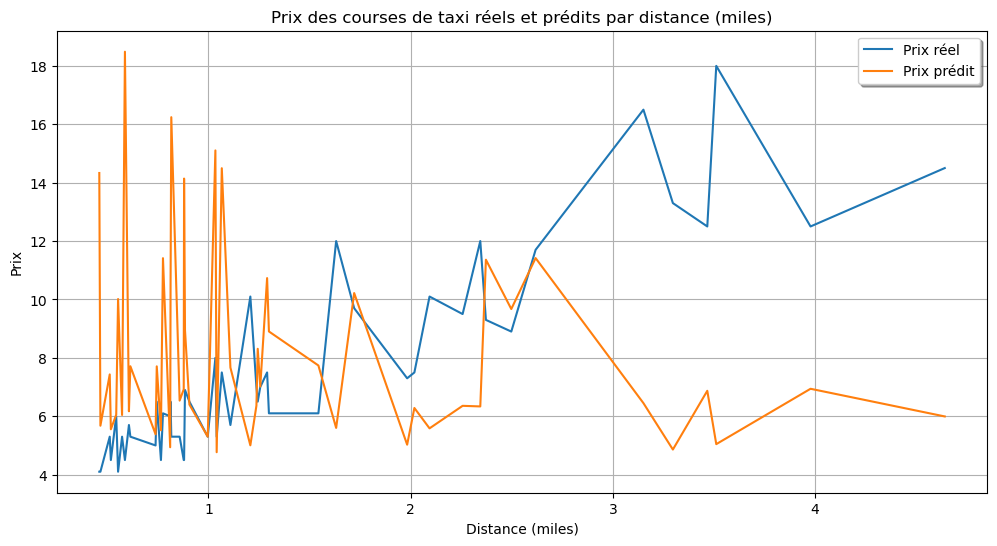

In [31]:
# Triez les données de validation et les prédictions par distance en miles
sorted_indices = X_val[100:150]['Distance (miles)'].sort_values().index
y_val_sorted = y_val[100:150].loc[sorted_indices]
y_pred_sorted = y_pred[100:150][sorted_indices.argsort()]
distances_miles = X_val[100:150]['Distance (miles)'].loc[sorted_indices]

# Visualisation dans un graphique
plt.figure(figsize=(12, 6))
plt.plot(distances_miles, y_val_sorted, label="Prix réel")
plt.plot(distances_miles, y_pred_sorted, label="Prix prédit")
plt.title("Prix des courses de taxi réels et prédits par distance (miles)")
plt.xlabel('Distance (miles)')
plt.ylabel('Prix')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()